In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

%matplotlib inline

In [2]:
food_data = pd.read_csv("data/item_list.csv")
restaurant_data = pd.read_csv("data/outlet_visits.csv")


In [3]:
food_data.head()

,brand_name,outlet_name,product_title,title_english,description,description_english,primary_cuisine,cuisines,Sep Orders,Oct Orders,Nov Orders
0,SAFRANBOLU,SAFRANBOLU,1107. Lamb Kadai,1107. Lamb Kadai,NaN,NaN,Middle Eastern,"Middle Eastern,Curry",1522,655,1542
1,Return of Lemak (BaseHall),Return of Lemak (BaseHall),Le Grand Noir IGT Pinot Noir 2016 Red Wine,Le Grand Noir IGT Pinot Noir 2016 Red Wine,"Pays d'Oc, France (bottled)","Pays d'Oc, France (bottled)",Malaysian,"Southeast Asian,Noodles,Asian,Malaysian",1200,1014,566
2,Bedana's Filipino Restaurant,Bedana's Filipino Restaurant,Spring Rolls Set,Spring Rolls Set,NaN,NaN,NaN,"Filipino,Southeast Asian,Asian",714,740,1230
3,Toast Box,Toast Box (Tsing Yi),Curry Chicken Chop Rice,Curry Chicken Chop Rice,NaN,NaN,Singaporean,"Western,Sandwich,South East Asian,Singaporean,...",1574,1250,1750
4,Hot Dog Link,Hot Dog Link (Yuen Long),Small Frankfurter,Small Frankfurter,Only sausage | Choice of sausage on stick or h...,Only sausage | Choice of sausage on stick or h...,German,"European,German",14,801,651


In [4]:
restaurant_data.head()

,brand_name,outlet_name,Sep Visits,Oct Visits,Nov Visits
0,Chun Yee Thai Restaurant,Chun Yee Thai Restaurant,27163,33573,26078
1,Tai Chung Wah Restaurant,Tai Chung Wah Restaurant,18963,27491,34351
2,Spicy Mama Private Kitchen,Spicy Mama Private Kitchen,23763,34098,31332
3,Chuen Ting,Chuen Ting (Tin Hau),26476,38165,30673
4,Tianyuan Dumplings,Tianyuan Dumplings (Mong Kok),34187,24837,41905


In [5]:
food_data.size

7901762

In [7]:
food_data.shape

(718342, 11)

In [6]:
food_data['Sep Orders'].describe()

count    718342.000000
mean       1009.019793
std         483.072097
min           0.000000
25%         664.000000
50%        1000.000000
75%        1338.000000
max        3418.000000
Name: Sep Orders, dtype: float64

In [7]:
food_data['Sep Orders'][3]

1574

In [9]:
food_data['primary_cuisine_tag'] = ''
food_data['secondary_cuisine_1'] = ''
food_data['secondary_cuisine_2'] = ''
food_data['secondary_cuisine_3'] = ''
food_data['suitability_1'] = ''
food_data['suitability_2'] = ''
food_data['main_1'] = ''
food_data['main_2'] = ''
food_data['main_3'] = ''
food_data['main_4'] = ''
food_data['main_5'] = ''
food_data['taste_1'] = ''
food_data['taste_2'] = ''
food_data['taste_3'] = ''
food_data['taste_4'] = ''
food_data['taste_5'] = ''

In [10]:
food_data.head()

,brand_name,outlet_name,product_title,title_english,description,description_english,primary_cuisine,cuisines,Sep Orders,Oct Orders,...,main_1,main_2,main_3,main_4,main_5,taste_1,taste_2,taste_3,taste_4,taste_5
0,SAFRANBOLU,SAFRANBOLU,1107. Lamb Kadai,1107. Lamb Kadai,NaN,NaN,Middle Eastern,"Middle Eastern,Curry",1522,655,...,,,,,,,,,,
1,Return of Lemak (BaseHall),Return of Lemak (BaseHall),Le Grand Noir IGT Pinot Noir 2016 Red Wine,Le Grand Noir IGT Pinot Noir 2016 Red Wine,"Pays d'Oc, France (bottled)","Pays d'Oc, France (bottled)",Malaysian,"Southeast Asian,Noodles,Asian,Malaysian",1200,1014,...,,,,,,,,,,
2,Bedana's Filipino Restaurant,Bedana's Filipino Restaurant,Spring Rolls Set,Spring Rolls Set,NaN,NaN,NaN,"Filipino,Southeast Asian,Asian",714,740,...,,,,,,,,,,
3,Toast Box,Toast Box (Tsing Yi),Curry Chicken Chop Rice,Curry Chicken Chop Rice,NaN,NaN,Singaporean,"Western,Sandwich,South East Asian,Singaporean,...",1574,1250,...,,,,,,,,,,
4,Hot Dog Link,Hot Dog Link (Yuen Long),Small Frankfurter,Small Frankfurter,Only sausage | Choice of sausage on stick or h...,Only sausage | Choice of sausage on stick or h...,German,"European,German",14,801,...,,,,,,,,,,


In [11]:
food_data.primary_cuisine.unique()

array(['Middle Eastern', 'Malaysian', nan, 'Singaporean', 'German',
       'French', 'Indonesian', 'Mexican', 'Asian', 'Fast Food', 'Dessert',
       'Healthy', 'Spanish', 'Mediterranean', 'Beijing', 'European',
       'British', 'Drinks', 'Pizza', 'Burgers', 'Sandwich',
       'South American', 'Halal', 'Noodles', 'Cakes & Bakery', 'Thai',
       'Indian', 'Korean', 'Chinese', 'Italian', 'Sichuan', 'Western',
       'American', 'Japanese', 'Cantonese', 'Chiu Chow', 'Hong Kong',
       'Taiwanese', 'Vietnamese', 'Shanghainese', 'International',
       'Southeast Asian'], dtype=object)

In [12]:
primary_nationalities = food_data.primary_cuisine.unique()

In [13]:
print(primary_nationalities)

['Middle Eastern' 'Malaysian' nan 'Singaporean' 'German' 'French'
 'Indonesian' 'Mexican' 'Asian' 'Fast Food' 'Dessert' 'Healthy' 'Spanish'
 'Mediterranean' 'Beijing' 'European' 'British' 'Drinks' 'Pizza' 'Burgers'
 'Sandwich' 'South American' 'Halal' 'Noodles' 'Cakes & Bakery' 'Thai'
 'Indian' 'Korean' 'Chinese' 'Italian' 'Sichuan' 'Western' 'American'
 'Japanese' 'Cantonese' 'Chiu Chow' 'Hong Kong' 'Taiwanese' 'Vietnamese'
 'Shanghainese' 'International' 'Southeast Asian']


In [14]:
primary_nationalities = ['Middle Eastern', 'Malaysian', 'Singaporean', 'German', 'French', 'Indonesian',
                         'Mexican', 'Asian', 'Spanish', 'Mediterranean', 'Beijing', 'European', 
                         'British', 'South American', 'Halal', 'Thai', 'Indian', 'Korean', 'Chinese',
                         'Italian', 'Sichuan', 'Western', 'American', 'Japanese', 'Cantonese', 'Chiu Chow',
                         'Hong Kong', 'Taiwanese', 'Vietnamese', 'Shanghainese', 'International', 'Southeast Asian']

In [16]:
food_data['product_title'][1]

'Le Grand Noir IGT Pinot Noir 2016 Red Wine'

In [27]:
food_data['product_title'][0:3]

0                              1107. Lamb Kadai
1    Le Grand Noir IGT Pinot Noir 2016 Red Wine
2                              Spring Rolls Set
Name: product_title, dtype: object

In [17]:
test_list = ["1107. Lamb Kadai", "C. Vegetable Curry with Rice", "103. Plain Boiled Eggplant with Garlic"]
test_object = "1107. Lamb Kedai"

In [57]:
test_object = re.sub(".+[.]", "", test_object)
print(test_object)

 Lamb Kedai


In [18]:
len(test_list)

3

In [64]:
i = 0
while i < len(test_list):
    test_list[i] = re.sub(".+[.]", "", test_list[i])
    i += 1

In [65]:
print(test_list)

[' Lamb Kadai', ' Vegetable Curry with Rice', ' Plain Boiled Eggplant with Garlic']


In [66]:
len(food_data['product_title'])

718342

In [42]:
smol_df = food_data.sample(100)
pd.set_option("display.max_columns", None)

In [43]:
smol_df

,brand_name,outlet_name,product_title,title_english,description,description_english,primary_cuisine,cuisines,Sep Orders,Oct Orders,Nov Orders,primary_cuisine_tag,secondary_cuisine_1,secondary_cuisine_2,secondary_cuisine_3,suitability_1,suitability_2,main_1,main_2,main_3,main_4,main_5,taste_1,taste_2,taste_3,taste_4,taste_5
512746,Ngan Lung Restaurant (Jaffe Road) [Late Night ...,Ngan Lung Restaurant (Jaffe Road) [Late Night ...,H3. Pork Chop with Spicy Noodle in Yunnan Style,H3. Pork Chop with Spicy Noodle in Yunnan Style,NaN,NaN,Hong Kong,"Asian,Hong Kong",943,1252,1042,,,,,,,,,,,,,,,,
589986,Café de Coral,Café de Coral (Carnarvon Plaza),Marinated Egg and Pork with Rice (Small)‧Deep-...,Marinated Egg and Pork with Rice (Small)‧Deep-...,Served with tea/coffee/soft drink,Served with tea/coffee/soft drink,Hong Kong,"Asian,Hong Kong",827,201,394,,,,,,,,,,,,,,,,
133432,BLZ Restaurant,BLZ Restaurant (Tsim Sha Tsui),Sliced Lotus Root,Sliced Lotus Root,NaN,NaN,Sichuan,"Asian,Chinese,Sichuan",1630,1851,794,,,,,,,,,,,,,,,,
552321,Café de Coral,Café de Coral (Fung Tak),Garden Gourmet Hot Dog‧Spring Roll,Garden Gourmet Hot Dog‧Spring Roll,With tea/coffee/soft drink,With tea/coffee/soft drink,Hong Kong,"Asian,Hong Kong",611,957,1644,,,,,,,,,,,,,,,,
294923,Ippudo,Ippudo HK (Jordan),Frozen Lychee Highball,Frozen Lychee Highball,NaN,NaN,Japanese,"Ramen,Asian,Dumpling,Noodles,Japanese",802,654,1792,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68127,Sang Kee,Sang Kee Noodle Restaurant,Lemongrass Pork Chop with Noodles in Soup,Lemongrass Pork Chop with Noodles in Soup,NaN,NaN,Chinese,"Noodles,Asian,Chinese",928,1659,660,,,,,,,,,,,,,,,,
313534,Yuan Shan Vegetarian,Yuan Shan Vegetarian,"702. Singaporean Fried Rice Noodles, Curry pow...","702. Singaporean Fried Rice Noodles, Curry pow...",Contain egg | Spicy,Contain egg | Spicy,Cantonese,"Cantonese,Asian,Chinese",1318,387,528,,,,,,,,,,,,,,,,
82415,Yugu Noodle,Yugu Noodle (MK),Iced Coffee with Milk Tea,Iced Coffee with Milk Tea,NaN,NaN,Chinese,"Noodles,Asian,Chinese",1309,1934,801,,,,,,,,,,,,,,,,
218670,McDonald's,McDonald's (Kwong Yuen),Hot Local Milk Tea (S),NaN,NaN,NaN,American,"Burgers,American,Western",1758,1876,878,,,,,,,,,,,,,,,,


In [ ]:
def item

In [93]:
test_list_quant = ["Shredded Beef Brisket with Sweet Roti (1 pc)", "Satay Chicken Skewers (6 sticks)", 
                 "Monster Taquitos (6pcs)"]
test_object_quant = "Monster Taquitos (6pcs)"

In [94]:
test_object_quant = re.sub(r'\([^)]+\)', "", test_object_quant)
print(test_object_quant)

Monster Taquitos 


In [95]:
i = 0
while i < len(test_list_quant):
    test_list_quant[i] = re.sub(r'\([^)]+\)', "", test_list_quant[i])
    i += 1
print(test_list_quant)

['Shredded Beef Brisket with Sweet Roti ', 'Satay Chicken Skewers ', 'Monster Taquitos ']


In [19]:
j = 0
while j < len(food_data['product_title']):
    food_data['product_title'][j] = re.sub(r'\([^)]*\)', "",  food_data['product_title'][j])
    j += 1

C:\Users\kkaus\AppData\Local\Temp/ipykernel_27696/3901821428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data['product_title'][j] = re.sub(r'\([^)]*\)', "",  food_data['product_title'][j])


KeyboardInterrupt: 

In [22]:
test_list_set = ["Delivery Dinner Set for 1", "Set for 4-6 Pax", "set for 4"]
test_object_set = "Delivery Dinner Set for 1"

In [23]:
if (re.search("[Ss]et", test_object_set) != None):
    test_object_set = "SET ITEM"

#test_object_set = re.sub("", "", test_object_set)
print(test_object_set)

SET ITEM


In [103]:
i = 0
while i < len(test_list_set):
    if(re.search("[Ss]et", test_list_set[i]) != None):
        test_list_set[i] = "SET ITEM"
    i += 1
print(test_list_set)

['SET ITEM', 'SET ITEM', 'SET ITEM']


In [ ]:
j = 0
while j < len(food_data['product_title']):
    if(re.search("[Ss]et", food_data['product_title'][j]) != None):
        food_data['product_title'][j] = food_data[description][j]
    j += 1
print(test_list_set)

In [24]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

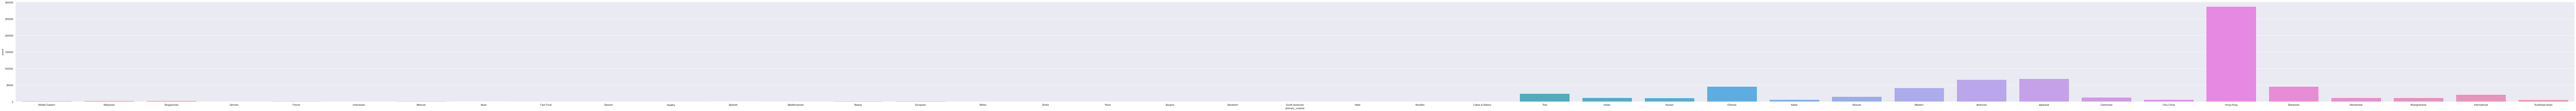

In [55]:

sns.countplot(data=food_data, x = 'primary_cuisine');
sns.set(rc = {'figure.figsize':(300,8)})


<AxesSubplot:ylabel='brand_name'>

c:\Users\kkaus\OneDrive - HKUST Connect\Foodpanda\Data\foodpanda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kkaus\OneDrive - HKUST Connect\Foodpanda\Data\foodpanda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26391 (\N{CJK UNIFIED IDEOGRAPH-6717}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kkaus\OneDrive - HKUST Connect\Foodpanda\Data\foodpanda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kkaus\OneDrive - HKUST Connect\Foodpanda\Data\foodpanda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35352 (\N{CJK UNIFIED IDEOGRAPH-8A18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kkaus\OneDrive - HKUST 

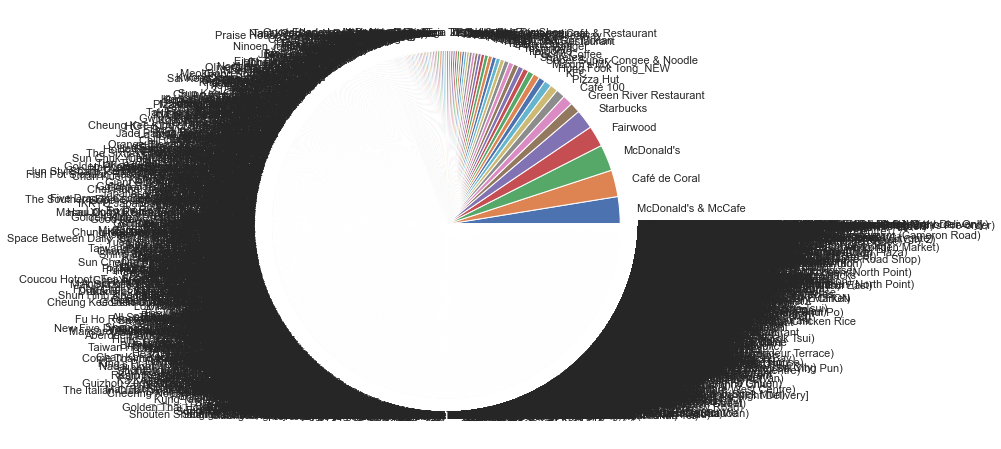

In [61]:
food_data["brand_name"].value_counts().plot(kind='pie')